In [1]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )
import StateUtilities as SU

In [2]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [3]:
import visualization_helper_v2 as vh

In [4]:
rundir = {
    "../checkpoints/b001": "Baseline",

    "../checkpoints/s302-ln/20210611-1800/": "S1",
    "../checkpoints/s302-ln/20210612-1948/": "S1",

    "../checkpoints/s314-no-shared/20210615-1332/": "S2",

    "../checkpoints/s314/20210613-0839/": "S3",

    "../checkpoints/s151/20210616-1555_ch_rwd_fn/": "S4",

    "../checkpoints/s313/20210612-1008/": "S5",
    "../checkpoints/s313/20210615-1523/": "S5",
    "../checkpoints/s313-newlambda/20210615-1529/": "S5-2",
    "../checkpoints/s313-newlambda/20210617-1856/": "S5-2",
    "../checkpoints/s313-newlambda2/20210617-1140/": "S5-3",
    "../checkpoints/s313-newlambda2/20210617-1144/": "S5-3",
    "../checkpoints/s313-newlambda2/20210617-1855/": "S5-3",

    "../checkpoints/s311/20210611-1808/": "S6",
    "../checkpoints/s311/20210612-1007/": "S6",
    "../checkpoints/s311-newlambda/20210615-1529/": "S6-2",
    "../checkpoints/s311-newlambda/20210617-1856/": "S6-2",
    "../checkpoints/s311-newlambda2/20210619-0956/": "S6-3",
    "../checkpoints/s311-newlambda2/20210619-1926/": "S6-3"
}

In [5]:
colortable = {
    "Baseline": "k",
    "S1": "crimson",
    "S2": "magenta",
    "S3": "blueviolet",
    "S4": "pink",
    "S5": "blue",
    "S5-2": "dodgerblue",
    "S5-3": "aqua",
    "S6": "yellowgreen",
    "S6-2": "darkorange",
    "S6-3": "chocolate"
}

In [6]:
dirnames = list(rundir.keys())

In [7]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table s

In [8]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  11679
Last available evaluation episode for dfs2:  15999
Last available evaluation episode for dfs3:  15624
Last available evaluation episode for dfs4:  37499
Last available evaluation episode for dfs5:  17999
Last available evaluation episode for dfs6:  24999
Last available evaluation episode for dfs7:  24999
Last available evaluation episode for dfs8:  24999
Last available evaluation episode for dfs9:  24999
Last available evaluation episode for dfs10:  24999
Last available evaluation episode for dfs11:  24999
Last available evaluation episode for dfs12:  24999
Last available evaluation episode for dfs13:  10799
Last available evaluation episode for dfs14:  24999
Last available evaluation episode for dfs15:  24999
Last available evaluation episode for dfs16:  24999
Last available evaluation episode for dfs17:  24999
Last available evaluation episode for dfs18:  24999


In [9]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [10]:
econs_mstpc_list = vh.output_reward_informations(subdfs, selected_episodes)
econs_mstpc_np = np.array(econs_mstpc_list)
label_entries = list(rundir.values())

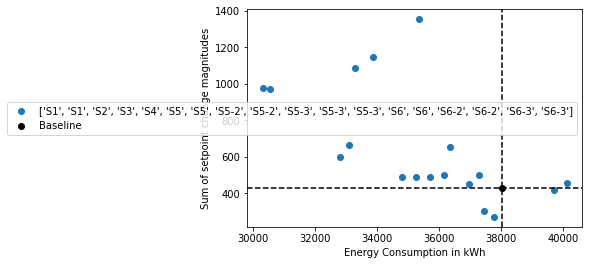

In [11]:
plt.scatter(x = econs_mstpc_np[1:,0], y = econs_mstpc_np[1:,1], label=label_entries[1:])
plt.xlabel("Energy Consumption in kWh")
plt.ylabel("Sum of setpoint change magnitudes")
plt.scatter(x = [econs_mstpc_np[0,0]], y = [econs_mstpc_np[0,1]], color='k', label="Baseline")
plt.axvline(x = econs_mstpc_np[0,0], color='k', linestyle='--')
plt.axhline(y = econs_mstpc_np[0,1], color='k', linestyle='--')
plt.legend()

In [12]:
econs_mstpc_list = vh.output_reward_informations(subdfs, selected_episodes)
econs_mstpc_df = pd.DataFrame(econs_mstpc_list)
label_entries = list(rundir.values())
econs_mstpc_df.columns = ['Energy consumption in kWh', "Sum of setpoint change magnitudes"]
econs_mstpc_df["label"] = label_entries

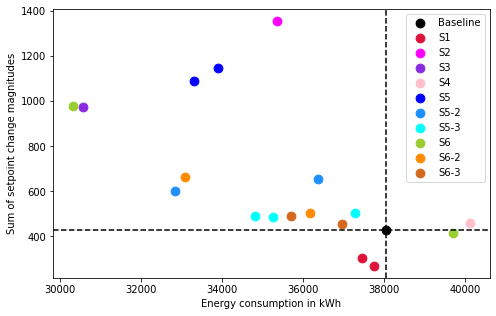

In [19]:
plt.figure(figsize=(7,4.5))
plt.xlabel("Energy consumption in kWh")
plt.ylabel("Sum of setpoint change magnitudes")
#plt.scatter(x = [econs_mstpc_np[0,0]], y = [econs_mstpc_np[0,1]], color='k', label="Baseline")
plt.axvline(x = econs_mstpc_np[0,0], color='k', linestyle='--')
plt.axhline(y = econs_mstpc_np[0,1], color='k', linestyle='--')

for ulabel in econs_mstpc_df["label"].unique():
    emloc = econs_mstpc_df.loc[ econs_mstpc_df["label"] == ulabel ]
    plt.scatter(x = emloc["Energy consumption in kWh"],
                y = emloc["Sum of setpoint change magnitudes"],
                label=ulabel,
                color=colortable[ulabel],
                s=77)

plt.legend()
plt.tight_layout()
plt.savefig("saved_plots/comparison_as_scatternplot.png")
plt.savefig("saved_plots/comparison_as_scatternplot.pdf")

In [20]:
econs_mstpc_df

,Energy consumption in kWh,Sum of setpoint change magnitudes,label
0,38042.138368,426.881189,Baseline
1,37463.167738,303.030427,S1
2,37760.380616,269.994678,S1
3,35344.074920,1354.183672,S2
4,30555.398464,970.549086,S3
5,40118.108442,458.136458,S4
6,33888.522535,1146.741711,S5
7,33302.001504,1088.412385,S5
8,36363.633230,655.032493,S5-2
9,32826.404177,599.162905,S5-2
